<a href="https://colab.research.google.com/github/crocha12/Teoria/blob/main/TP/relatorioTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatorio Tecnico TP3**

## Introdução

Uma APND é uma nova variação do automato não determinístico AFND onde incluímos uma pilha que nos permite reconhecer outras palavras, que antes eram impossíveis de serem reconhecidas por um AFD ou AFND. A pilha é usada de tal forma que em cada transição é verificado o último símbolo contido na pilha e ao realizar a transição um novo símbolo é empilhado. Diferente do AFND ou AFD o automato de pilha contém outras formas de determinar que uma palavra é reconhecida, nos AF era apenas necessário que o automato se encontrasse em um estado final após o último símbolo da palavra, já em AP é necessário estar em um estado final e com a pilha vazia, ou outras formas como apenas a pilha vazia ou apenas estado final. Nesse presente trabalho é o utilizado o reconhecimento com pilha vazia e estado final.

## Projeto e Implementação do Algoritmo

O algoritmo foi projetado com base nos desenvolvidos anteriormente, porém diferente da implementação AFND tomando base no AFD, foi necessário fazer diversas mudanças e testes, a presença das transições lambdas fez com que durante o desenvolvimento fosse feita uma verificação da transição lambda antes e pós-transição, foi utilizado também duas classes, onde a primeira(StateStack) possuía os atributos code(nome do estado) e stack(pilha), e a segunda(Transition) responsável por armazenar os dados da transição com os atributos current(estado atual), symbol(caractere de transição), unstack(símbolo a ser desempilhado), next(próximo estado) e stack(símbolo a ser empilhado), além dessas classes temos as funções checkTransition que com base no estado e caractere retorna uma lista de possíveis transições, checkUnStack para verificar se o símbolo a ser desempilhada estar no topo da pilha e por fim updateStatesList que recebe como parametro o estado atual, um símbolo e a lista de Estados usada para controlar um não determinismo.

## Metodologia:

Para desenvolver o algoritmo foi necessário elaborar uma alta quantidade de teste, e com base em cada teste o algoritmo passou por diversas mudanças, essa metodologia de desenvolvimento tem semelhança com uma técnica bastante utilizada por desenvolvedores que simpatizam com o clean code a metodologia de TDD, visto que o TDD prega que o código é desenvolvido após a criação dos testes, ou seja, código guiado por testes. Dentre os teste foram utilizadas as linguagens $L_1 =  \{a^nb^n | n >= 0\}, $  $L_2 = \{a^nb^m | m >= n > 0 \}, $ $L_3 = \{a^nb^m | m >= n >= 0 \}, $ $L_4 = \{a^{2n}b^n | n >= 0 \} e $  $L_5 = \{a^nb^mc^n | m, n >= 0 \} $

## Resultados e Conclusões:

Para analisar o tempo de execução serão feitos testes para as linguagens $L_1$ e $L_4$ onde iremos variar o valor de n entre 1 e 1000 onde o tamanho da palavra representa $2*n$ para $L_1$ e $3*n$ para $L_4$.

Gerando as lista de palavras

In [ ]:
n = 1000
W1 = []
W2 = []
for i in range(n):
  p = 'a'*(i+1) + 'b'*(i+1)
  W1.append(p)
for i in range(n):
  p = 'aa'*(i+1) + 'b'*(i+1)
  W2.append(p)

Foram feitas modificações no algoritmo original para poder registrar o seu tempo e além disso adicionamos a lib time

In [ ]:
import time

In [ ]:
class StateStack:
  def __init__(self, code, stack):
    self.code = code
    self.stack = stack

class Transition:
  def __init__(self, current, symbol, unstack, next, stack):
    self.current = current
    self.symbol = symbol
    self.unstack = unstack
    self.next = next
    self.stack = stack

def checkTransition(current, symbol):
  return list(filter(lambda x: x.current == current and x.symbol == symbol, Transitions))

def printarArrayState(a):
  print('ArrayState')
  for i in a:
    print('    ', i.code, i.stack)
  print('end')

def printTransition(tr, state):
  print('Transitions para', state.code, state.stack)
  for t in tr:
    print('    ',t.next, t.unstack, t.stack)
  print('end')

def checkUnStack(stack, verifyStack):
  if len(stack) < len(verifyStack):
    return False
  for i in range(len(verifyStack)):
    if verifyStack[i] != stack[(i+1)*-1]:
      return False
  return True

def updateStatesList(e, symbol, E):
  tr = checkTransition(e.code, symbol)
  for t in tr:
    if t.unstack == ['*'] or checkUnStack(e.stack, t.unstack):
      state = StateStack(t.next, [*e.stack])
      if t.unstack != ['*']:
        for i in t.unstack:
          state.stack.pop()
      if t.stack != ['*']:
        state.stack = [*state.stack, *t.stack]
      E.append(state)
      if symbol != '*':
        tr = checkTransition(e.code, '*')
        for t in tr:
          if t.unstack == ['*'] or checkUnStack(e.stack, t.unstack):
            state = StateStack(t.next, [*state.stack])
            if t.unstack != ['*']:
              for i in t.unstack:
                state.stack.pop()
            if t.stack != ['*']:
              state.stack = [*state.stack, *t.stack]
            E.append(state)
  return E   
def main():
  Times = []
  for w in wordsList:
    ini = time.time()
    palavra = list(w)
    E = [StateStack(initialState, [])]
    for p in palavra:
      Next = []
      while len(E) > 0:
        e = E.pop()
        E = updateStatesList(e, '*', E)
        Next = updateStatesList(e, p, Next)
      E = Next
    status = 'N'
    for e in E:
      if e.code in endStates and len(e.stack) == 0:
        status = 'S'
    # print(status)
    end = time.time()
    Times.append(end - ini)
  return Times

$ L_1 =  \{a^nb^n | n >= 0\} $

In [ ]:
statesList = ['0', '1']
alphabet = ['a', 'b']
stackAlphabet = ['A']
n = 3
Transitions = [
    Transition('0', 'a', ['*'], '0', ['A']),
    Transition('0', '*', ['*'], '1', ['*']),
    Transition('1', 'b', ['A'], '1', ['*'])
]

initialState = '0'
endStates = ['1']

wordsList = W1

T1 = main()

Para fazer uma regressão linear utilizaremos a lib sklearn e, além disso, usaremos a lib pyplot para plotar os gráficos e numpy para trabalharmos de forma melhor com os arrays.

y = 3.496884523343263e-05x + -1.672435451193638e-06
ou
tempo = 3.496884523343263e-05n + -1.672435451193638e-06


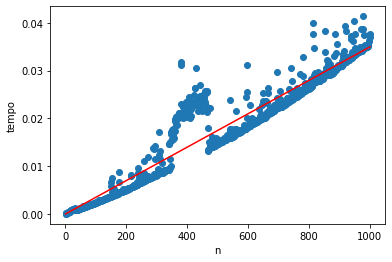

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = np.array(list(zip(range(1,1001))))
y = np.array(T1)
lr.fit(x,y)
plt.xlabel('n')
plt.ylabel('tempo')
plt.scatter(x, T1)
plt.plot(x, lr.predict(x), color='red')
a = lr.coef_[0]
b= lr.intercept_
print("y = {}x + {}".format(a, b))
print("ou")
print("tempo = {}n + {}".format(a, b))

$ L_4 =  \{a^{2n}b^n | n >= 0\} $

In [ ]:
statesList = ['0', '1']
alphabet = ['a', 'b']
stackAlphabet = ['A']
n = 3
Transitions = [
    Transition('0', 'a', ['*'], '0', ['A']),
    Transition('0', '*', ['*'], '1', ['*']),
    Transition('1', 'b', list('AA'), '1', ['*'])
]

initialState = '0'
endStates = ['1']

wordsList = W2

T2 = main()

y = 8.004979600219232e-05x + -0.006994088500827604
ou
tempo = 8.004979600219232e-05n + -0.006994088500827604


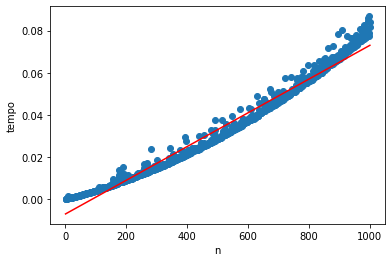

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = np.array(list(zip(range(1,1001))))
y = np.array(T2)
lr.fit(x,y)
plt.xlabel('n')
plt.ylabel('tempo')
plt.scatter(x, T2)
plt.plot(x, lr.predict(x), color='red')
a = lr.coef_[0]
b= lr.intercept_
print("y = {}x + {}".format(a, b))
print("ou")
print("tempo = {}n + {}".format(a, b))